In [58]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

### Import data

In [62]:
df_data = pd.read_csv("Audiobooks-data.csv", header=None)

In [63]:
df_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,873,2160.0,2160,10.13,10.13,0,8.91,0.0,0.0,0,0,1
1,611,1404.0,2808,6.66,13.33,1,6.50,0.0,0.0,0,182,1
2,705,324.0,324,10.13,10.13,1,9.00,0.0,0.0,1,334,1
3,391,1620.0,1620,15.31,15.31,0,9.00,0.0,0.0,0,183,1
4,819,432.0,1296,7.11,21.33,1,9.00,0.0,0.0,0,0,1


In [64]:
# Drop customer_id
df_data.drop([0], axis=1, inplace=True)
df_data.head()

,1,2,3,4,5,6,7,8,9,10,11
0,2160.0,2160,10.13,10.13,0,8.91,0.0,0.0,0,0,1
1,1404.0,2808,6.66,13.33,1,6.50,0.0,0.0,0,182,1
2,324.0,324,10.13,10.13,1,9.00,0.0,0.0,1,334,1
3,1620.0,1620,15.31,15.31,0,9.00,0.0,0.0,0,183,1
4,432.0,1296,7.11,21.33,1,9.00,0.0,0.0,0,0,1


### Check data for imbalance

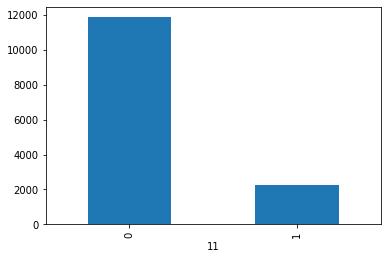

In [18]:
df_data.groupby(11).size().plot(kind="bar")

In [22]:
class_a = df_data.groupby(11).size()[0]
class_b = df_data.groupby(11).size()[1]
print(f"#Class A: {class_a}, #Class B: {class_b}")

#Class A: 11847, #Class B: 2237


### Balance the dataset by undersampling

In [29]:
df_data = df_data.sample(frac=1)

In [34]:
df_a = df_data[df_data[11]==1]
df_b = df_data[df_data[11]==0]
df_b = df_b.iloc[:df_a.shape[0], :]
print(f"size of cl1: {df_a.shape[0]}, size of cl0: {df_b.shape[0]}")

size of cl1: 2237, size of cl0: 2237


In [37]:
# Concatenate both classes and shuffle the dataset
df_data = pd.concat([df_a, df_b]).sample(frac=1)
df_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
3584,21437,2160.0,2160,6.40,6.40,0,8.91,0.00,567.0,0,223,0
1880,28077,1620.0,1620,7.99,7.99,0,8.91,0.00,0.0,0,0,1
11640,23205,1620.0,1620,6.58,6.58,1,9.00,0.22,0.0,0,111,0
1916,7322,2160.0,2160,8.42,8.42,0,8.91,0.00,0.0,0,164,1
13148,6271,2160.0,2160,5.33,5.33,0,8.91,0.21,0.0,0,10,0


### Split dataset into training, validatin and test

In [49]:
observations = df_data.shape[0]
training_size = int(0.8*observations)
validation_size = int(0.1*observations)
test_size = observations - (training_size + validation_size)

data = df_data.iloc[:, :-1]
targets = df_data[11]

# Scale the data before splitting
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Merge data and targets before splitting
data_scaled_targets = pd.concat([data, targets], axis=1)

# Split the dataset
x_train = data_scaled_targets.iloc[:training_size, :]
y_train = data_scaled_targets.iloc[:training_size]
x_valid = data_scaled_targets.iloc[training_size:training_size + validation_size, :]
y_valid = data_scaled_targets.iloc[training_size:training_size + validation_size]
x_test = data_scaled_targets.iloc[training_size + validation_size : , :]
y_test = data_scaled_targets.iloc[training_size + validation_size :]

### Save processed datasets

In [50]:
np.savez("audio_book_training.npz", inputs=x_train, targets=y_train)
np.savez("audio_book_validation.npz", inputs=x_valid, targets=y_valid)
np.savez("audio_book_test.npz", inputs=x_test, targets=y_test)

### Load the dataset

In [56]:
npz = np.load("audio_book_training.npz")
x_train = npz["inputs"].astype(np.float)
y_train = npz["targets"].astype(np.int)

npz = np.load("audio_book_validation.npz")
x_valid = npz["inputs"].astype(np.float)
y_valid = npz["targets"].astype(np.int)

npz = np.load("audio_book_test.npz")
x_test = npz["inputs"].astype(np.float)
y_test = npz["targets"].astype(np.int)

In [53]:
type(x_train)

numpy.ndarray

In [54]:
type(x_valid)

pandas.core.frame.DataFrame